In [ ]:
#Importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [169]:
lend_info = pd.read_csv('data/lending_club_info.csv',index_col='LoanStatNew')
df = pd.read_csv('data/lending_club_loan_two.csv')

In [170]:
print(lend_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [ ]:
def feat_description(col_name):
      print(lend_info.loc[col_name]['Description'])

In [172]:
feat_description('mort_acc')

Number of mortgage accounts.


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Explolatory Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

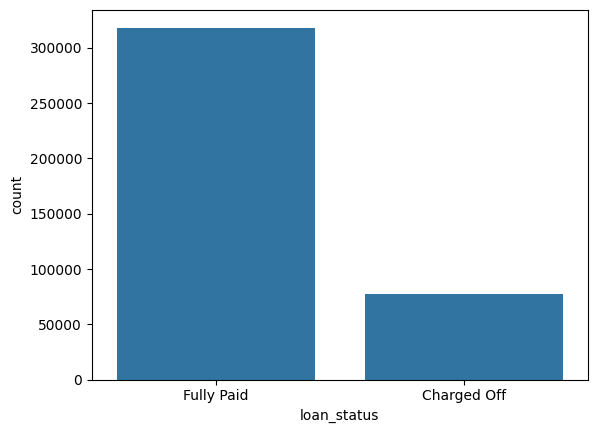

In [ ]:
#Checking the distribution of the target variable
sns.countplot(data=df,x='loan_status')

The plot shows that the target variable is highly unbalanced. Individuals that defaulted on the loan is significantly less than than those that paid fully.

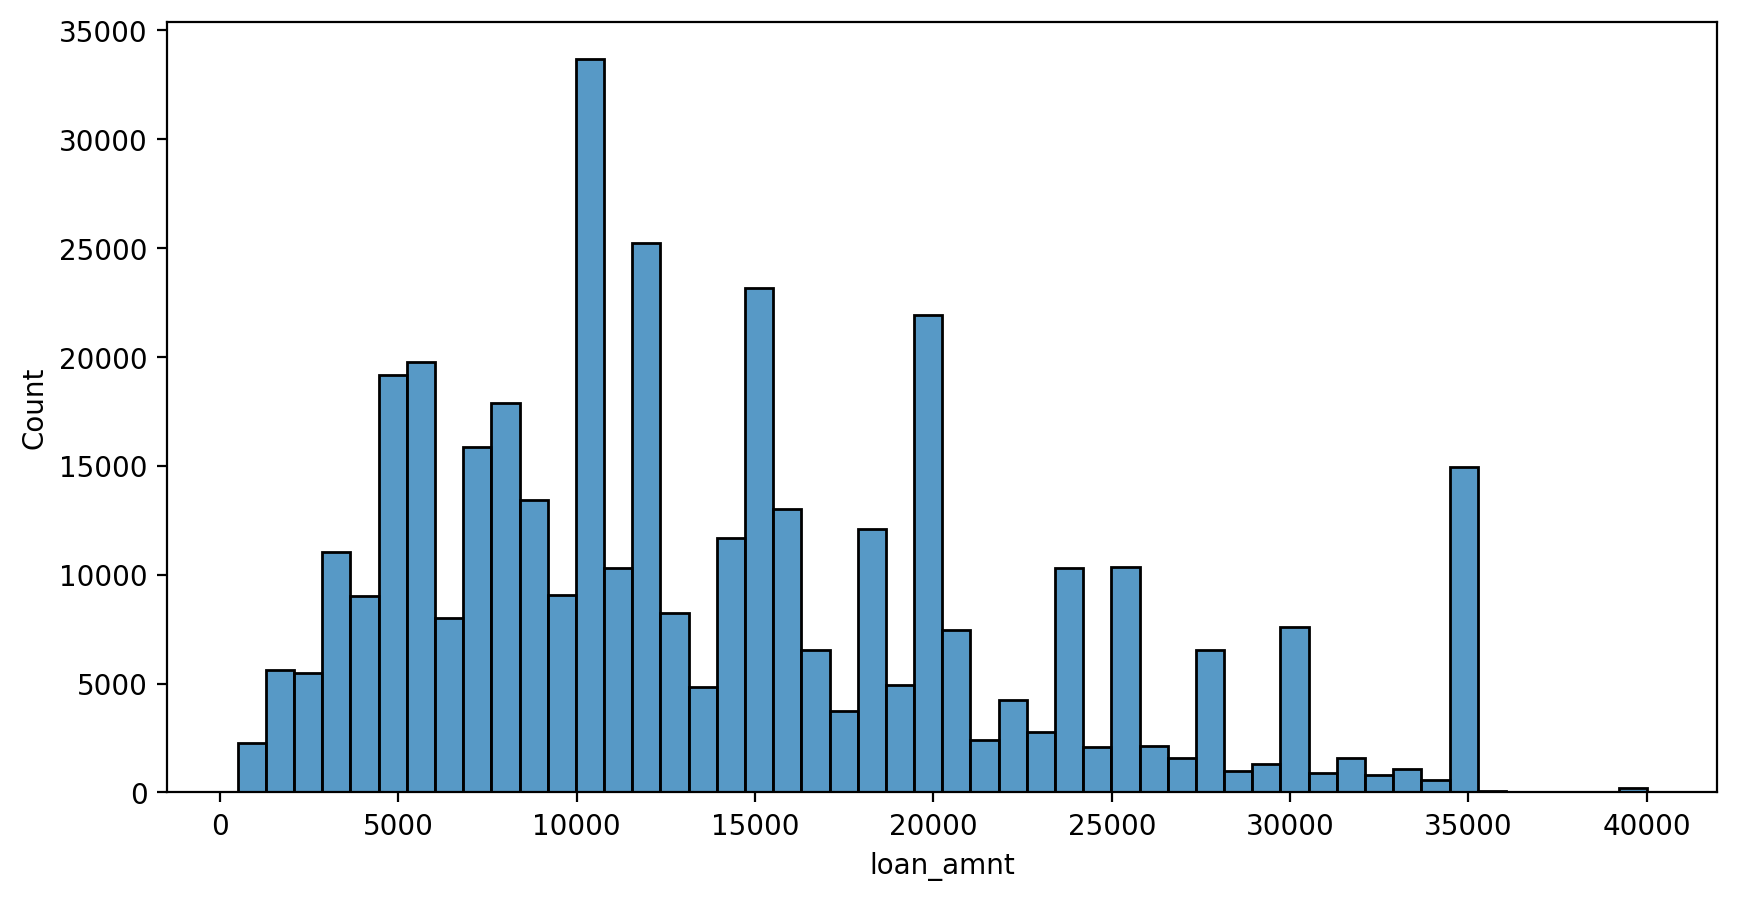

In [ ]:
# Let's visualize the distribution of the loan amount
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(df['loan_amnt'],bins=50);

Most people take loans between 5000 and 20000 dollars.

In [ ]:
#Calculating the correlation between features.
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

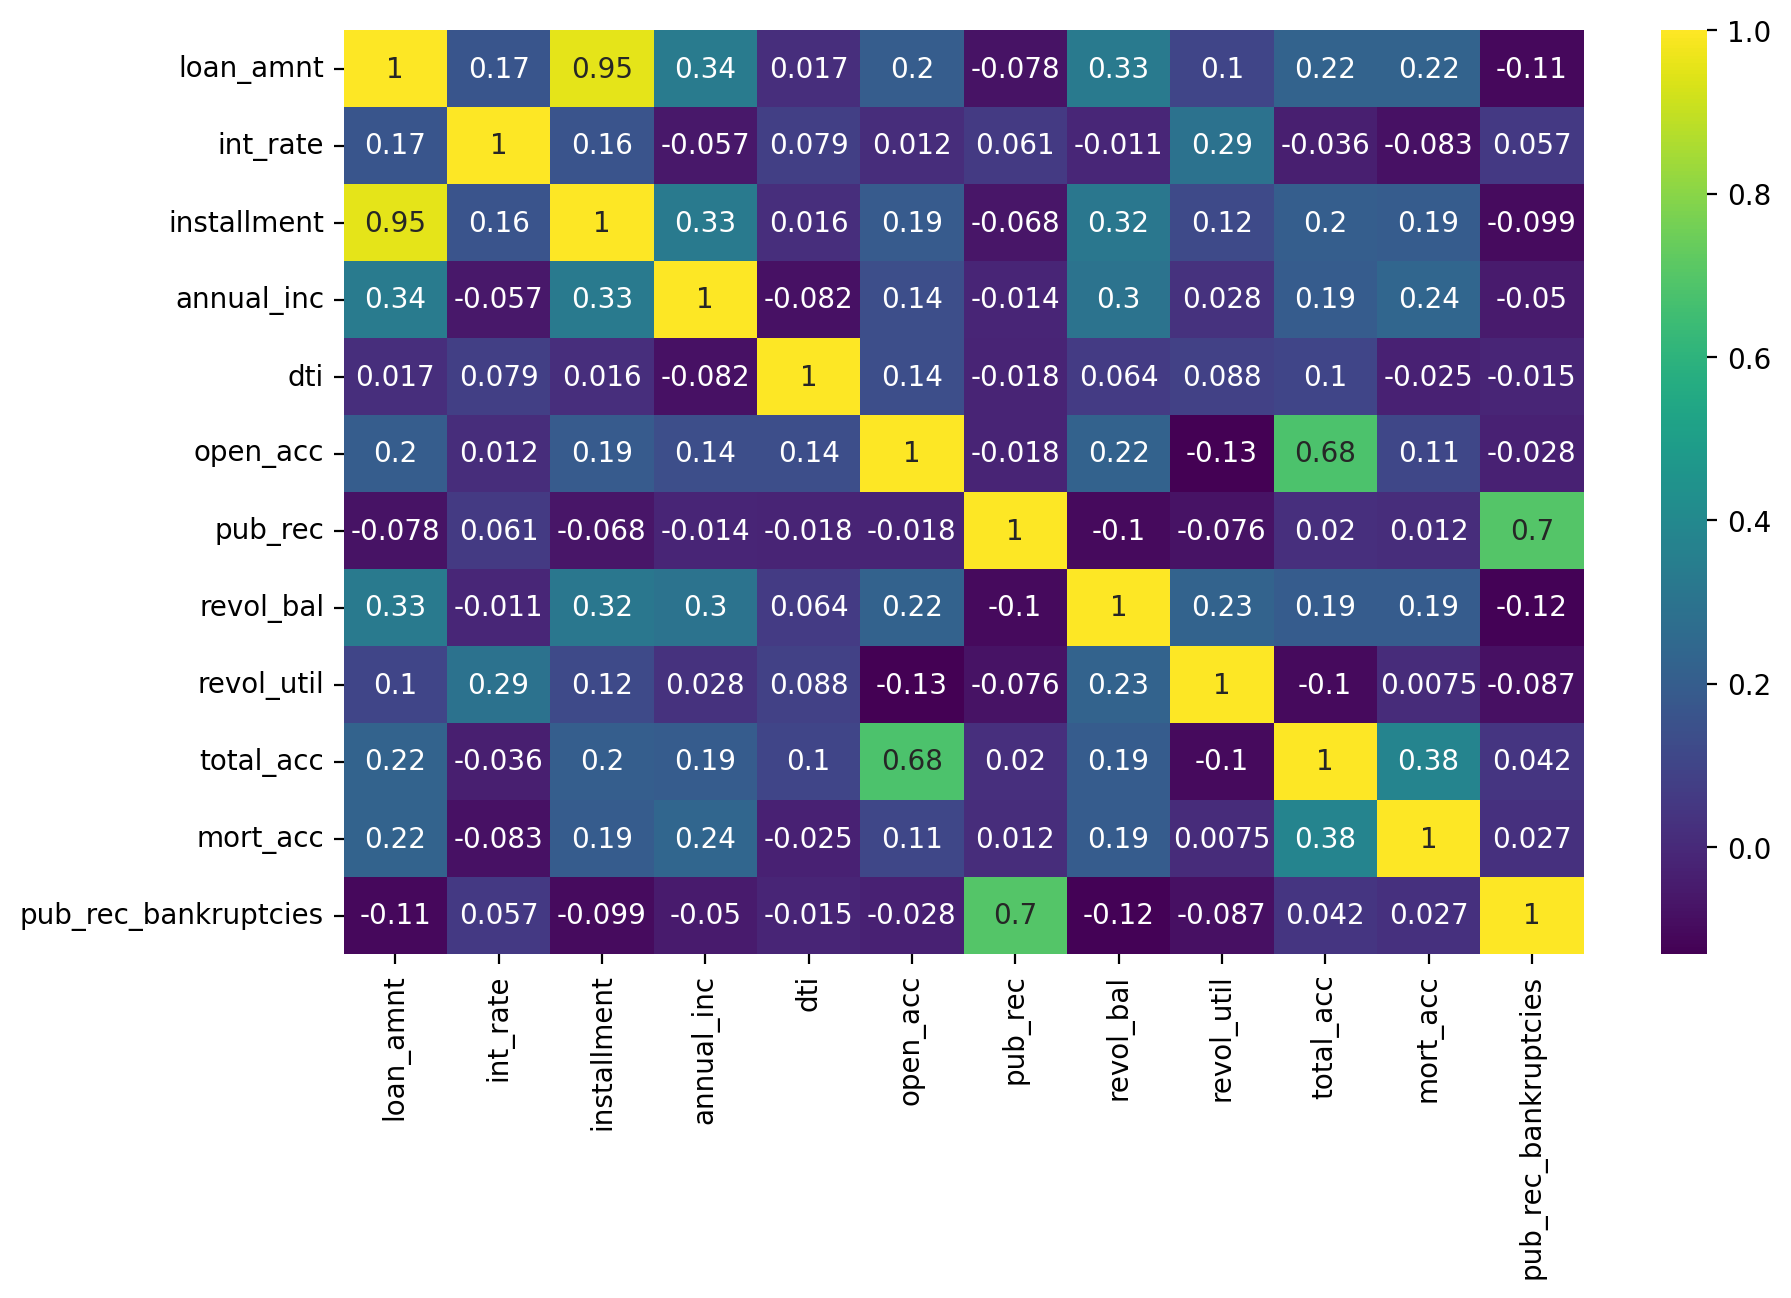

In [177]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(df.corr(numeric_only=True),cmap='viridis',annot=True)

In [178]:
feat_description('loan_amnt')
print('\n')
feat_description('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


The monthly payment owed by the borrower if the loan originates.


<Axes: xlabel='loan_amnt', ylabel='installment'>

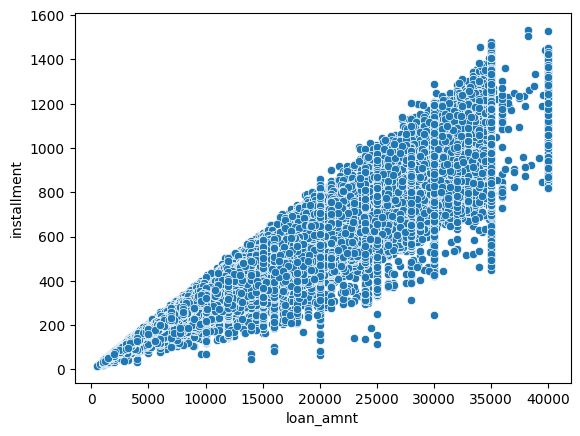

In [179]:
sns.scatterplot(data=df,x='loan_amnt',y='installment')

In [180]:
df[['loan_status','loan_amnt']]

,loan_status,loan_amnt
0,Fully Paid,10000.0
1,Fully Paid,8000.0
2,Fully Paid,15600.0
3,Fully Paid,7200.0
4,Charged Off,24375.0
...,...,...
396025,Fully Paid,10000.0
396026,Fully Paid,21000.0
396027,Fully Paid,5000.0
396028,Fully Paid,21000.0


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

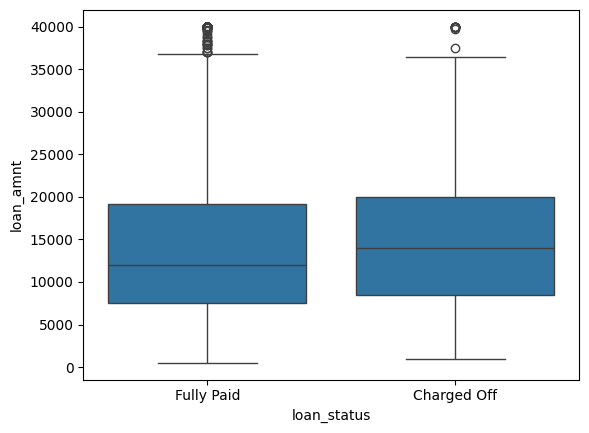

In [181]:
sns.boxplot(data= df,x='loan_status',y='loan_amnt')

In [182]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [183]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [184]:
feat_description('grade')

LC assigned loan grade


In [185]:
print(df['sub_grade'].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


<Axes: xlabel='grade', ylabel='count'>

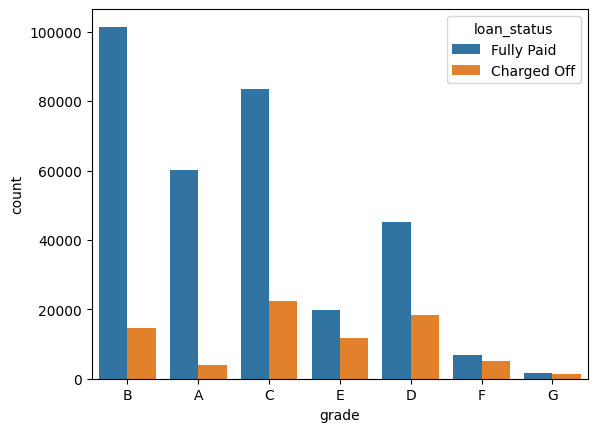

In [186]:
sns.countplot(data=df,x='grade',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

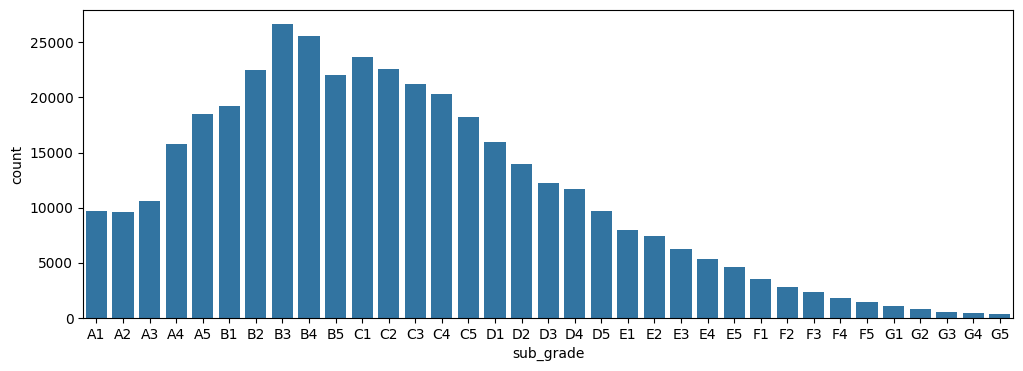

In [187]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade',order=df.groupby('sub_grade')['sub_grade'].count().index)

<Axes: xlabel='sub_grade', ylabel='count'>

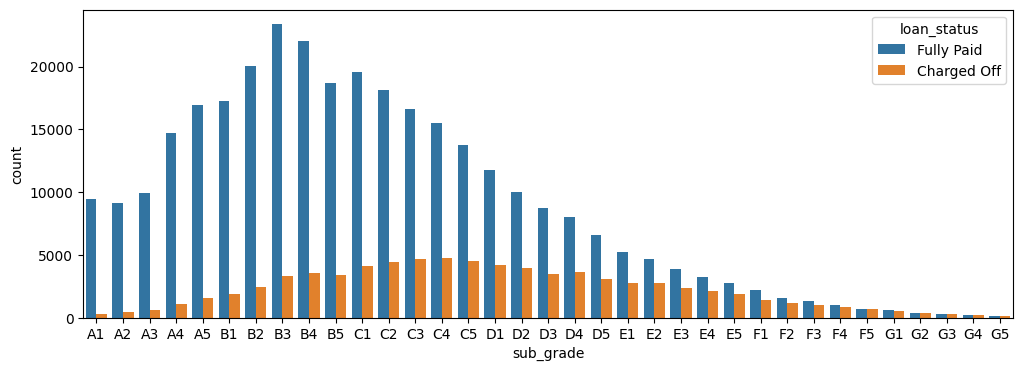

In [188]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade',order=df.groupby('sub_grade')['sub_grade'].count().index,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

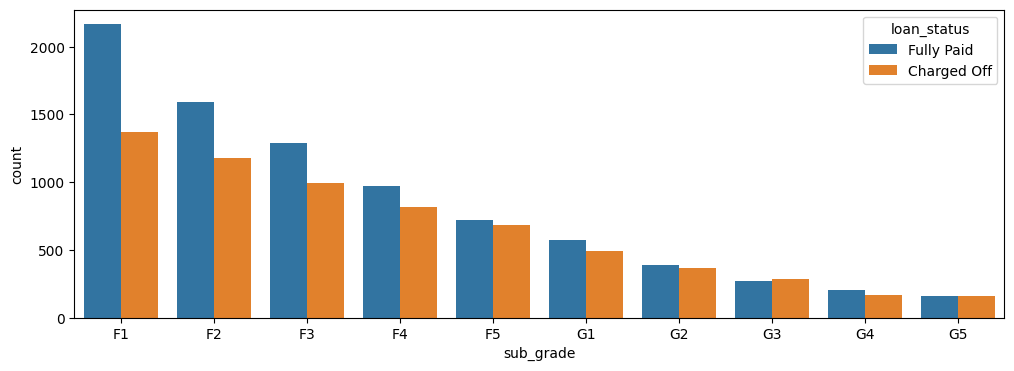

In [189]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='sub_grade',order=df.groupby('sub_grade')['sub_grade'].count().index[-10:],hue='loan_status')

In [190]:
df.groupby('sub_grade')['sub_grade'].count().index[-10:]

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'], dtype='object', name='sub_grade')

In [191]:
df2 = df.copy()

In [192]:
df2['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [193]:
def create_unique(status):
    if status == 'Fully Paid':
        return 1
    else:
        return 0

In [194]:
df2['loan_repaid'] = df2['loan_status'].apply(create_unique)

In [195]:
df2[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [196]:
df2['loan_repaid'].dtype

dtype('int64')

<Axes: >

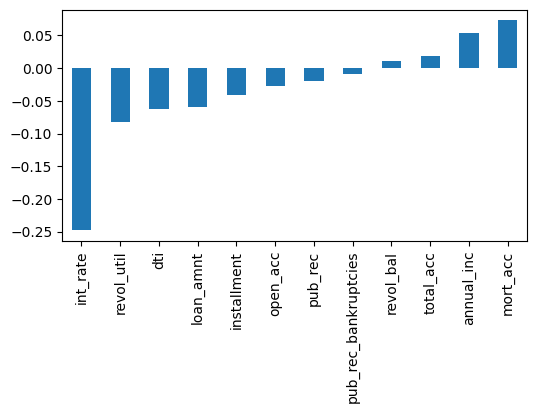

In [197]:
plt.figure(figsize=(6,3))
df2.corr(numeric_only=True)['loan_repaid'][:-1].sort_values().plot(kind='bar')

# DATA PREPROCESSING

In [198]:
100 * (df.isnull().sum()/len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [199]:
def missing_value(null):
    percent_nan = 100 * (df.isnull().sum()/len(df))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [200]:
percent_nan = missing_value(df)

<Axes: xlabel='None', ylabel='None'>

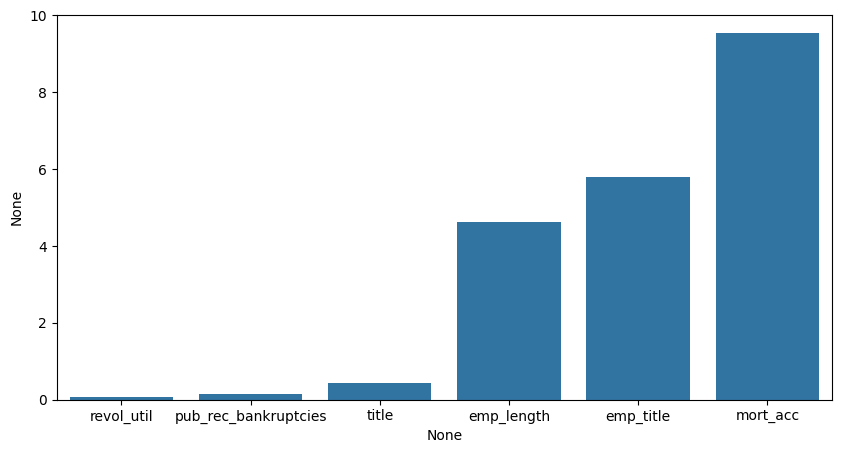

In [201]:
plt.figure(figsize=(10,5))
sns.barplot(x=percent_nan.index,y=percent_nan)

In [202]:
feat_description('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [203]:
df['emp_title'].nunique()

173105

In [204]:
df.drop('emp_title',axis=1,inplace=True)

In [205]:
def missing_value(null):
    percent_nan = 100 * (df.isnull().sum()/len(df))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [206]:
percent_nan = missing_value(df)

<Axes: xlabel='None', ylabel='None'>

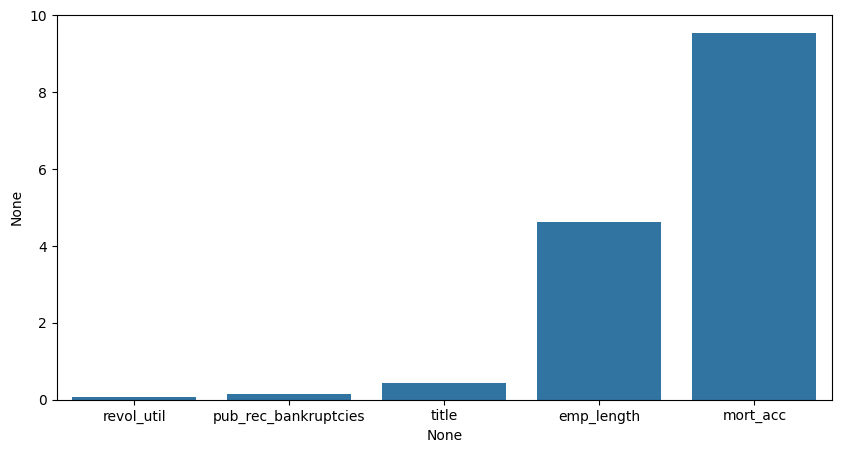

In [207]:
plt.figure(figsize=(10,5))
sns.barplot(x=percent_nan.index,y=percent_nan)

In [208]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [209]:
df['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

<Axes: xlabel='emp_length', ylabel='count'>

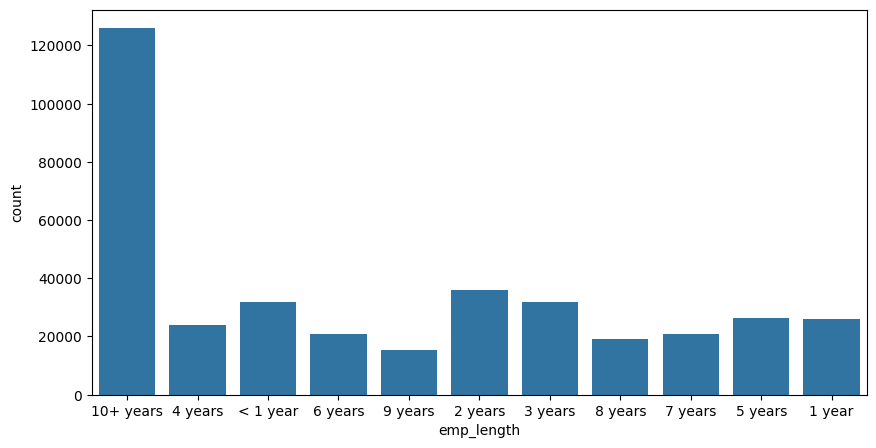

In [210]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length')

In [211]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years']

In [212]:
df.groupby('emp_length')['emp_length'].value_counts().index.sort_values(ascending=True)

Index(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object', name='emp_length')

<Axes: xlabel='emp_length', ylabel='count'>

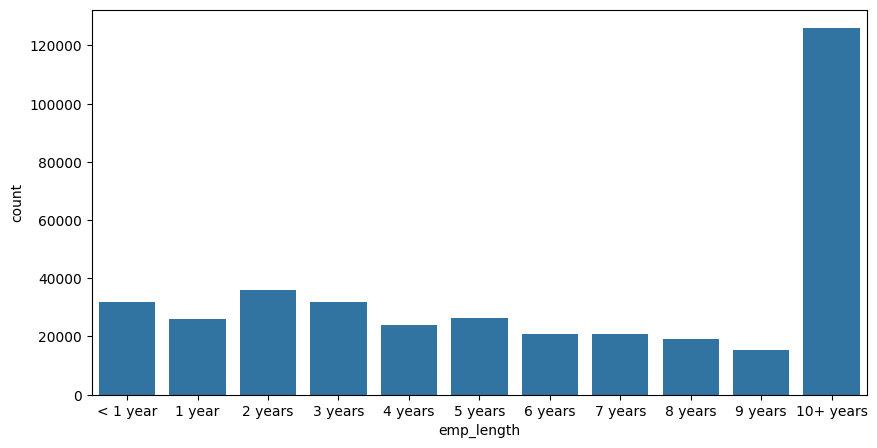

In [213]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length',order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

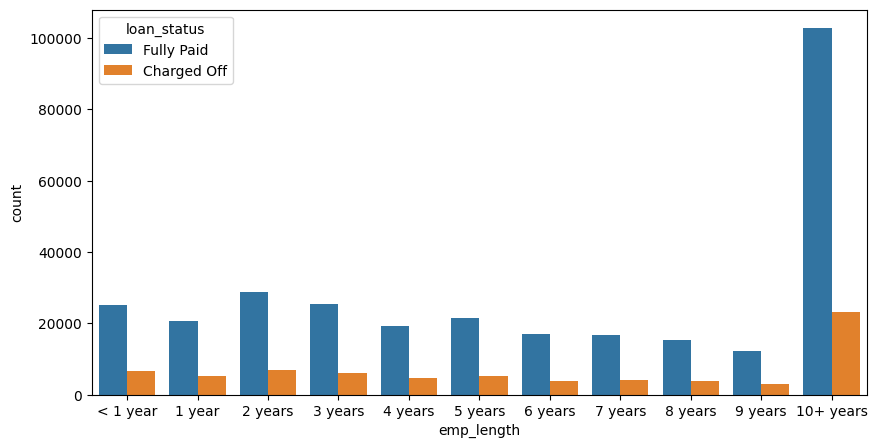

In [214]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length',order=emp_length_order,hue='loan_status')

In [215]:
df.groupby('emp_length')['loan_status'].count()

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_status, dtype: int64

In [216]:
len(df[df['loan_status'] == 'Charged Off']) / df.groupby('emp_length')['loan_status'].count()

emp_length
1 year       3.001043
10+ years    0.616252
2 years      2.168002
3 years      2.452961
4 years      3.242861
5 years      2.931610
6 years      3.726932
7 years      3.730871
8 years      4.052222
9 years      5.072026
< 1 year     2.448322
Name: loan_status, dtype: float64

In [217]:
df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [218]:
df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()#['loan_status']

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [219]:
df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status'] / df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [220]:
emp_len = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status'] / df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()

<Axes: xlabel='emp_length'>

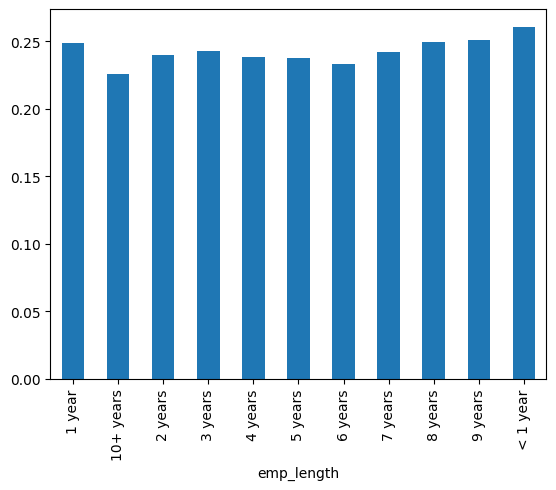

In [221]:
emp_len.plot(kind='bar')

In [222]:
df.drop(columns='emp_length',axis=1,inplace=True)

In [223]:
def missing_value(null):
    percent_nan = 100 * (df.isnull().sum()/len(df))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [224]:
percent_nan = missing_value(df)

<Axes: xlabel='None', ylabel='None'>

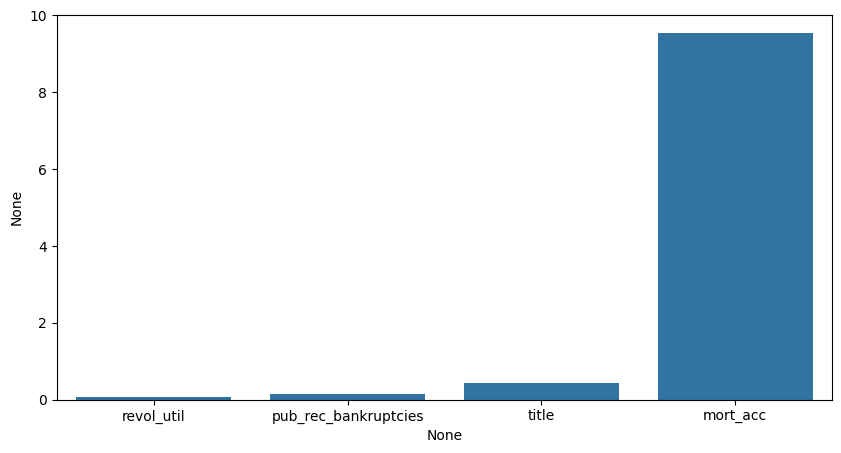

In [225]:
plt.figure(figsize=(10,5))
sns.barplot(x=percent_nan.index,y=percent_nan)

In [226]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [227]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [228]:
df.drop('title',axis=1,inplace=True)

In [229]:
def missing_value(null):
    percent_nan = 100 * (df.isnull().sum()/len(df))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [230]:
percent_nan = missing_value(df)

<Axes: xlabel='None', ylabel='None'>

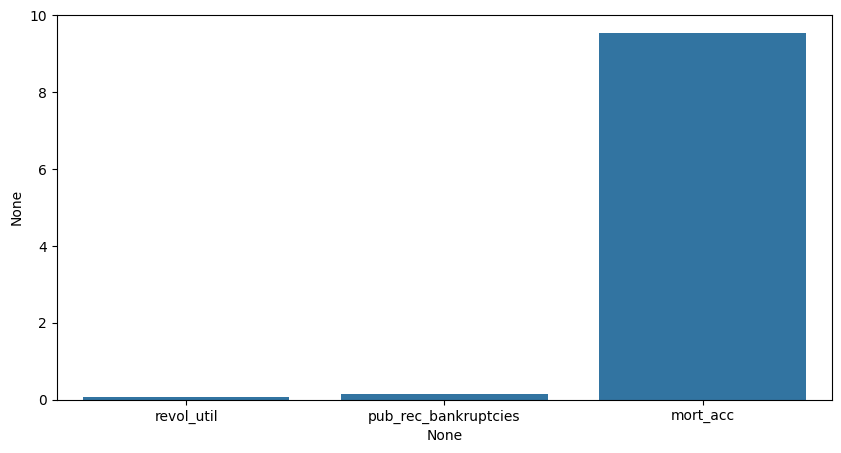

In [231]:
plt.figure(figsize=(10,5))
sns.barplot(x=percent_nan.index,y=percent_nan)

In [232]:
feat_description('mort_acc')

Number of mortgage accounts.


In [233]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
26.0         2
32.0         2
31.0         2
23.0         2
34.0         1
28.0         1
30.0         1
Name: count, dtype: int64

In [234]:
df.corr(numeric_only=True)['mort_acc'].sort_values(ascending=True)

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [235]:
print('Mean of the mort_acc per total_acc entry')
df.groupby('total_acc')['mort_acc'].mean()

Mean of the mort_acc per total_acc entry


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [236]:
df['mort_acc'] = df.groupby('total_acc')['mort_acc'].transform(lambda value: value.fillna(value.mean()))

In [237]:
def missing_value(null):
    percent_nan = 100 * (df.isnull().sum()/len(df))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [238]:
percent_nan = missing_value(df)

<Axes: xlabel='None', ylabel='None'>

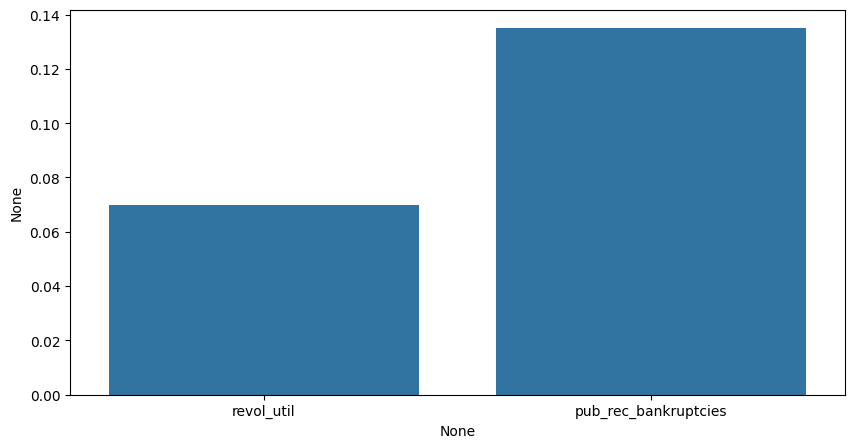

In [239]:
plt.figure(figsize=(10,5))
sns.barplot(x=percent_nan.index,y=percent_nan)

In [240]:
df[df['revol_util'].isnull()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
1686,2150.0,36 months,11.14,70.54,B,B2,MORTGAGE,50000.0,Source Verified,Apr-2013,...,2.0,0.0,0.0,NaN,21.0,w,INDIVIDUAL,3.000000,0.0,"77373 Mendoza Causeway Suite 785\nGibsonhaven,..."
3019,5000.0,36 months,13.79,170.38,C,C5,RENT,45000.0,Source Verified,Jan-2009,...,8.0,0.0,0.0,NaN,11.0,f,INDIVIDUAL,0.526570,0.0,"555 Smith Meadows Apt. 429\nBryanfurt, TN 05113"
4931,8000.0,36 months,13.67,272.15,B,B5,RENT,30000.0,Source Verified,Dec-2013,...,2.0,0.0,0.0,NaN,15.0,w,INDIVIDUAL,0.000000,0.0,"PSC 6735, Box 8380\nAPO AE 30723"
5382,7000.0,36 months,12.99,235.83,B,B4,MORTGAGE,61000.0,Verified,Oct-2013,...,2.0,0.0,0.0,NaN,32.0,f,INDIVIDUAL,5.000000,0.0,826 Glover Spring Suite 979\nNorth Amandashire...
9016,8000.0,36 months,12.12,266.18,B,B3,RENT,49000.0,Not Verified,Nov-2012,...,10.0,0.0,0.0,NaN,18.0,f,INDIVIDUAL,0.000000,0.0,"16908 Taylor Valley Suite 815\nBuchananfort, I..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385222,11200.0,60 months,20.20,297.98,E,E3,RENT,150000.0,Verified,Sep-2014,...,6.0,0.0,0.0,NaN,24.0,w,INDIVIDUAL,0.000000,0.0,"164 Nicole Roads Suite 229\nPort Tylerfurt, NV..."
388426,6000.0,36 months,11.44,197.69,B,B4,MORTGAGE,31000.0,Verified,Jan-2015,...,1.0,0.0,0.0,NaN,9.0,w,INDIVIDUAL,2.000000,0.0,"315 Samuel Valley\nLongberg, AR 30723"
390665,35000.0,60 months,17.56,880.42,D,D1,MORTGAGE,280000.0,Source Verified,Aug-2013,...,6.0,0.0,127137.0,NaN,12.0,f,INDIVIDUAL,3.000000,0.0,"51677 Cooper Squares\nPort Angelton, CT 93700"
395088,8000.0,36 months,19.42,294.95,E,E3,RENT,30000.0,Source Verified,Nov-2011,...,6.0,0.0,0.0,NaN,10.0,f,INDIVIDUAL,0.429158,0.0,"79018 Teresa Brooks Apt. 529\nSouth Julie, IL ..."


In [241]:
df.dropna(subset=['revol_util','pub_rec_bankruptcies'],axis=0,inplace=True)

In [242]:
def missing_value(null):
    percent_nan = 100 * (df.isnull().sum()/len(df))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan



percent_nan = missing_value(df)

<Axes: >

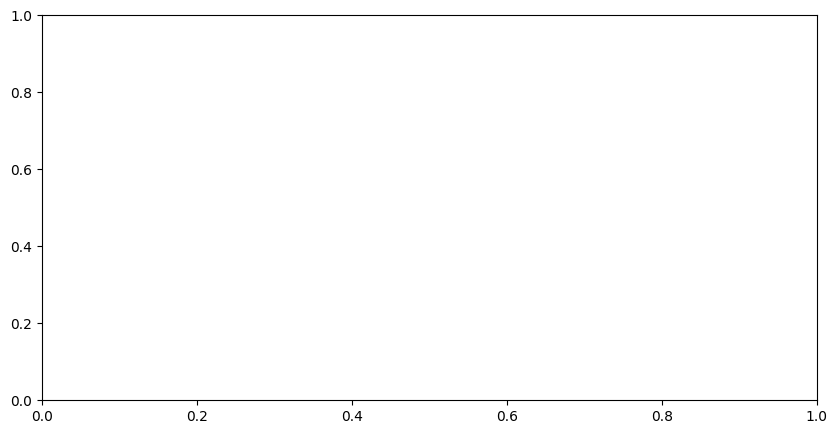

In [243]:
plt.figure(figsize=(10,5))
sns.barplot(x=percent_nan.index,y=percent_nan)

In [244]:
df.select_dtypes(include='O').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

## FEATURE ENGINEERING

In [245]:
print(df['term'].unique())

dmap = {' 36 months':36,' 60 months':60}

df['term'] = df['term'].map(dmap)

[' 36 months' ' 60 months']


In [246]:
df.drop('grade',axis=1,inplace=True)
dumies_subgrade = pd.get_dummies(df['sub_grade'],dtype='int',drop_first=True)
df = pd.concat([df,dumies_subgrade],axis=1)
df.drop('sub_grade',axis=1,inplace=True)

In [247]:
df.select_dtypes('O').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [248]:
col = ['verification_status','purpose', 'initial_list_status','application_type']
for column in col :
    print(f'{column} : {df[column].nunique()}')

verification_status : 3
purpose : 14
initial_list_status : 2
application_type : 3


In [249]:
df_columns = pd.get_dummies(df[['verification_status','purpose', 'initial_list_status','application_type']],drop_first=True,dtype='int')
df = pd.concat([df,df_columns],axis=1)
df.drop(columns=['verification_status','purpose', 'initial_list_status','application_type'],axis=1,inplace=True)

In [250]:
df.select_dtypes('O').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [251]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [252]:
df['home_ownership'].replace('NONE','OTHER',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12140\244193040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['home_ownership'].replace('NONE','OTHER',inplace=True)


In [253]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          139
ANY              3
Name: count, dtype: int64

In [254]:
df['home_ownership'].replace('ANY','OTHER',inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12140\2534709920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['home_ownership'].replace('ANY','OTHER',inplace=True)


In [255]:
home_owership = pd.get_dummies(df['home_ownership'],dtype='int',drop_first=True)
df = pd.concat([df,home_owership],axis=1)
df.drop('home_ownership',axis=1,inplace=True)

In [256]:
df['address'].str[-5:].nunique()

10

In [257]:
def extract_zipcode(address):
    return address[-5:]


df['zipcode'] = df['address'].apply(extract_zipcode)
df.drop('address',axis=1,inplace=True)
df_zipcode = pd.get_dummies(df['zipcode'],drop_first=True,dtype='int')
df = pd.concat([df,df_zipcode],axis=1)

In [258]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [259]:
feat_description('issue_d')

The month which the loan was funded


In [260]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [261]:
feat_description('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [262]:
df.drop('issue_d',axis=1,inplace=True)

In [263]:
df['earliest_cr_line'].dtype

dtype('O')

In [264]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_yr'] = df['earliest_cr_line'].apply(lambda x:x.year)
df.drop('earliest_cr_line',axis=1,inplace=True)
df['zipcode'] = pd.to_numeric(df['zipcode'])


C:\Users\USER\AppData\Local\Temp\ipykernel_12140\3612909578.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


In [265]:
df['loan_repaid'] = df['loan_status'].apply(create_unique)
df.drop('loan_status',axis=1,inplace=True)

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [268]:
len(df.columns)

80

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,stratify=y)

In [270]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [272]:
X_train.shape

(316175, 79)

In [273]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [274]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [275]:
model.fit(X_train,y_train,epochs=30,batch_size=256,validation_data=(X_test,y_test),verbose=2,callbacks = [early_stop])

Epoch 1/30
1236/1236 - 9s - 8ms/step - loss: 1.0753 - val_loss: 0.4934
Epoch 2/30
1236/1236 - 6s - 5ms/step - loss: 0.5463 - val_loss: 0.3651
Epoch 3/30
1236/1236 - 6s - 5ms/step - loss: 0.4191 - val_loss: 0.3272
Epoch 4/30
1236/1236 - 6s - 5ms/step - loss: 0.3614 - val_loss: 0.2950
Epoch 5/30
1236/1236 - 7s - 6ms/step - loss: 0.3403 - val_loss: 0.2930
Epoch 6/30
1236/1236 - 10s - 8ms/step - loss: 0.3213 - val_loss: 0.2791
Epoch 7/30
1236/1236 - 10s - 8ms/step - loss: 0.3031 - val_loss: 0.2766
Epoch 8/30
1236/1236 - 6s - 5ms/step - loss: 0.2926 - val_loss: 0.2691
Epoch 9/30
1236/1236 - 5s - 4ms/step - loss: 0.2846 - val_loss: 0.2649
Epoch 10/30
1236/1236 - 6s - 4ms/step - loss: 0.2783 - val_loss: 0.2676
Epoch 11/30
1236/1236 - 10s - 8ms/step - loss: 0.2759 - val_loss: 0.2631
Epoch 12/30
1236/1236 - 6s - 5ms/step - loss: 0.2744 - val_loss: 0.2641
Epoch 13/30
1236/1236 - 10s - 8ms/step - loss: 0.2760 - val_loss: 0.2628
Epoch 14/30
1236/1236 - 11s - 9ms/step - loss: 0.2757 - val_loss: 0.2

In [276]:
df_loss = pd.DataFrame(model.history.history)

<Axes: >

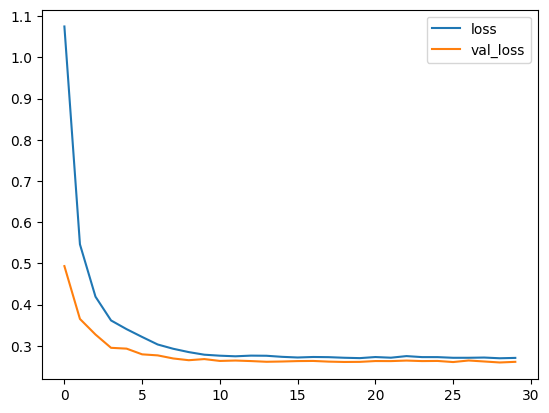

In [277]:
df_loss.plot()

In [278]:
prediction = model.predict(X_test)

2471/2471 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [279]:
pred = (prediction > 0.5).astype('int32')

In [280]:
from sklearn.metrics import classification_report,confusion_matrix

In [281]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61     15505
           1       0.88      1.00      0.94     63539

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [282]:
print(confusion_matrix(y_test,pred))

[[ 6802  8703]
 [    4 63535]]


In [283]:
import random
random.seed(101)
rand_id = random.randint(0,len(df))


new_customer = df.drop('loan_repaid',axis=1).iloc[rand_id]

In [284]:
new_customer.shape

(79,)

In [285]:
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
48052              0.00
70466              0.00
86630              0.00
93700              0.00
earliest_yr     1996.00
Name: 305323, Length: 79, dtype: float64

In [286]:
new_customer = new_customer.values.reshape(1,-1)
scaled_new_customer = scaler.transform(new_customer)
pred_new = model.predict(scaled_new_customer)
(pred_new > 0.5).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


array([[1]], dtype=int32)

In [287]:
from tensorflow.keras.models import load_model

In [288]:
model.save('ann_model.h5')